In [5]:
import pandas as pd

# Load the combined dataset
data = pd.read_csv('C:/Users/Lenovo/Desktop/ai_mini_project/dataset/traffic.csv')

# Display the first few rows of the dataset to ensure it's correctly combined
print(data.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  Rush Hour  \
0     NaN  288.28      0.0      0.0          40       Clouds          1   
1     NaN  289.36      0.0      0.0          75       Clouds          0   
2     NaN  289.58      0.0      0.0          90       Clouds          0   
3     NaN  290.13      0.0      0.0          90       Clouds          0   
4     NaN  291.14      0.0      0.0          75       Clouds          0   

   traffic_volume  
0            5545  
1            4516  
2            4767  
3            5026  
4            4918  


In [7]:
import pandas as pd

# Load the combined dataset
data = pd.read_csv('C:/Users/Lenovo/Desktop/ai_mini_project/dataset/_annotations.csv')

# Display the first few rows of the dataset to ensure it's correctly combined
print(data.head())

                                            filename  width  height  \
0  traffic-light-653-_jpg.rf.8a54c19f845d7f8173fd...    640     640   
1  traffic-light-236-_jpg.rf.8a7376d8a45bae3d9d41...    640     640   
2  493_png_jpg.rf.8a7653e4fafd99be8b1d3405be198af...    640     640   
3  traffic-light-532-_jpg.rf.8ad2ca25f7a7788ed584...    640     640   
4  318_png_jpg.rf.8ae78c1f5ece994c438fe02bf5559a1...    640     640   

            class  xmin  ymin  xmax  ymax  
0  Traffic-Yellow   526    51   542    94  
1   Traffic-Green   240   127   358   336  
2  Traffic-Yellow   182   181   286   306  
3   Traffic-Green   426    96   554   507  
4  Traffic-Yellow   340   185   433   322  


In [15]:
import pandas as pd

# Assuming the first dataset is saved as 'traffic_data.csv'
# and the second dataset is saved as 'traffic_light_annotations.csv'

# Load the traffic data
traffic_data = pd.read_csv('C:/Users/Lenovo/Desktop/ai_mini_project/dataset/traffic.csv')

# Load the traffic light annotations
traffic_light_data = pd.read_csv('C:/Users/Lenovo/Desktop/ai_mini_project/dataset/_annotations.csv')

# Display the first few rows of each dataset to ensure they are loaded correctly
print("Traffic Data:")
print(traffic_data.head())
print("\nTraffic Light Data:")
print(traffic_light_data.head())

# Ensure both datasets have the same length
min_length = min(len(traffic_data), len(traffic_light_data))

# Trim both datasets to the minimum length
traffic_data = traffic_data.head(min_length)
traffic_light_data = traffic_light_data.head(min_length)


# Combine the datasets
# For this example, we will assume there is a common key to join on, such as an index or a timestamp.
# Since the provided example does not have a clear common key, we will concatenate them directly for demonstration.

# Concatenate the datasets side by side
combined_data = pd.concat([traffic_data, traffic_light_data], axis=1)

# Display the combined dataset
print("\nCombined Data:")
print(combined_data.head())

# Save the combined dataset to a new CSV file
combined_data.to_csv('combined_traffic_data.csv', index=False)

Traffic Data:
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  Rush Hour  \
0     NaN  288.28      0.0      0.0          40       Clouds          1   
1     NaN  289.36      0.0      0.0          75       Clouds          0   
2     NaN  289.58      0.0      0.0          90       Clouds          0   
3     NaN  290.13      0.0      0.0          90       Clouds          0   
4     NaN  291.14      0.0      0.0          75       Clouds          0   

   traffic_volume  
0            5545  
1            4516  
2            4767  
3            5026  
4            4918  

Traffic Light Data:
                                            filename  width  height  \
0  traffic-light-653-_jpg.rf.8a54c19f845d7f8173fd...    640     640   
1  traffic-light-236-_jpg.rf.8a7376d8a45bae3d9d41...    640     640   
2  493_png_jpg.rf.8a7653e4fafd99be8b1d3405be198af...    640     640   
3  traffic-light-532-_jpg.rf.8ad2ca25f7a7788ed584...    640     640   
4  318_png_jpg.rf.8ae78c1f5ece994c438fe

In [17]:
combined_data = combined_data.drop(columns=['filename'])

In [19]:
print(combined_data.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  Rush Hour  \
0     NaN  288.28      0.0      0.0          40       Clouds          1   
1     NaN  289.36      0.0      0.0          75       Clouds          0   
2     NaN  289.58      0.0      0.0          90       Clouds          0   
3     NaN  290.13      0.0      0.0          90       Clouds          0   
4     NaN  291.14      0.0      0.0          75       Clouds          0   

   traffic_volume  width  height           class  xmin  ymin  xmax  ymax  
0            5545    640     640  Traffic-Yellow   526    51   542    94  
1            4516    640     640   Traffic-Green   240   127   358   336  
2            4767    640     640  Traffic-Yellow   182   181   286   306  
3            5026    640     640   Traffic-Green   426    96   554   507  
4            4918    640     640  Traffic-Yellow   340   185   433   322  


In [23]:
import pandas as pd

# Load the dataset
combined_data = pd.read_csv('C:/Users/Lenovo/Desktop/ai_mini_project/combined_traffic_data.csv')

# Display the first few rows of the dataset
print(combined_data.head())

# Check for missing values
missing_values = combined_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Ensure data types are appropriate
print("\nData types of each column:")
print(combined_data.dtypes)

# Check bounding box validity
invalid_bboxes = combined_data[(combined_data['xmin'] < 0) | (combined_data['ymin'] < 0) | (combined_data['xmax'] > combined_data['width']) | (combined_data['ymax'] > combined_data['height'])]
print("\nInvalid bounding boxes:")
print(invalid_bboxes)

# Check class balance
class_balance = combined_data['class'].value_counts()
print("\nClass balance:")
print(class_balance)

# Remove the 'filename' column if necessary
combined_data = combined_data.drop(columns=['filename'])

# Save the cleaned dataset
combined_data.to_csv('cleaned_traffic_light_data.csv', index=False)

print("\nData cleaning complete. Cleaned dataset saved as 'cleaned_traffic_light_data.csv'.")

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  Rush Hour  \
0     NaN  288.28      0.0      0.0          40       Clouds          1   
1     NaN  289.36      0.0      0.0          75       Clouds          0   
2     NaN  289.58      0.0      0.0          90       Clouds          0   
3     NaN  290.13      0.0      0.0          90       Clouds          0   
4     NaN  291.14      0.0      0.0          75       Clouds          0   

   traffic_volume                                           filename  width  \
0            5545  traffic-light-653-_jpg.rf.8a54c19f845d7f8173fd...    640   
1            4516  traffic-light-236-_jpg.rf.8a7376d8a45bae3d9d41...    640   
2            4767  493_png_jpg.rf.8a7653e4fafd99be8b1d3405be198af...    640   
3            5026  traffic-light-532-_jpg.rf.8ad2ca25f7a7788ed584...    640   
4            4918  318_png_jpg.rf.8ae78c1f5ece994c438fe02bf5559a1...    640   

   height           class  xmin  ymin  xmax  ymax  
0     640  Traffic-Yel

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
combined_data = pd.read_csv('C:/Users/Lenovo/Desktop/ai_mini_project/combined_traffic_data.csv')

# Fill missing values in 'holiday' column with 'None'
combined_data['holiday'] = combined_data['holiday'].fillna('None')

# Normalize continuous variables
scaler = MinMaxScaler()
combined_data[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']] = scaler.fit_transform(
    combined_data[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']]
)


# Save the cleaned and normalized dataset
combined_data.to_csv('cleaned_normalized_traffic_light_data.csv', index=False)

print("\nData cleaning and normalization complete. Cleaned dataset saved as 'cleaned_normalized_traffic_light_data.csv'.")


Data cleaning and normalization complete. Cleaned dataset saved as 'cleaned_normalized_traffic_light_data.csv'.


  holiday      temp  rain_1h  snow_1h  clouds_all weather_main  Rush Hour  \
0     NaN  0.705304      0.0      0.0        0.40       Clouds          1   
1     NaN  0.737485      0.0      0.0        0.75       Clouds          0   
2     NaN  0.744041      0.0      0.0        0.90       Clouds          0   
3     NaN  0.760429      0.0      0.0        0.90       Clouds          0   
4     NaN  0.790524      0.0      0.0        0.75       Clouds          0   

   traffic_volume                                           filename  width  \
0        0.763997  traffic-light-653-_jpg.rf.8a54c19f845d7f8173fd...    640   
1        0.616279  traffic-light-236-_jpg.rf.8a7376d8a45bae3d9d41...    640   
2        0.652311  493_png_jpg.rf.8a7653e4fafd99be8b1d3405be198af...    640   
3        0.689492  traffic-light-532-_jpg.rf.8ad2ca25f7a7788ed584...    640   
4        0.673988  318_png_jpg.rf.8ae78c1f5ece994c438fe02bf5559a1...    640   

   height           class  xmin  ymin  xmax  ymax  
0     640 

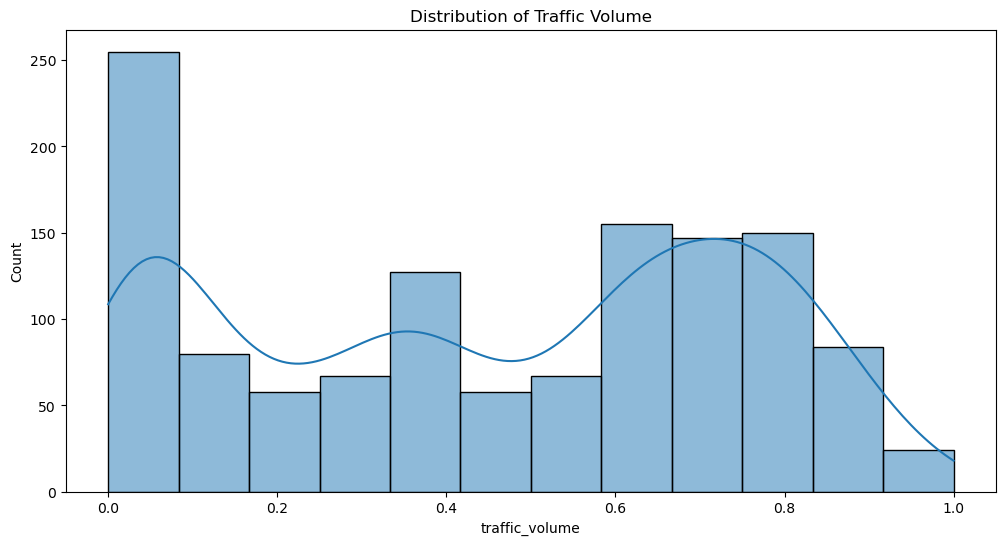

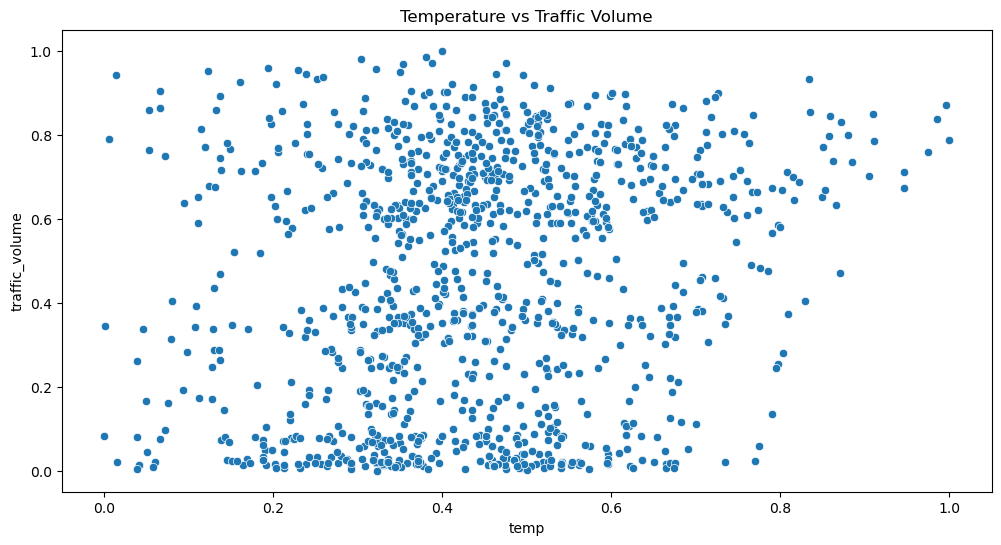

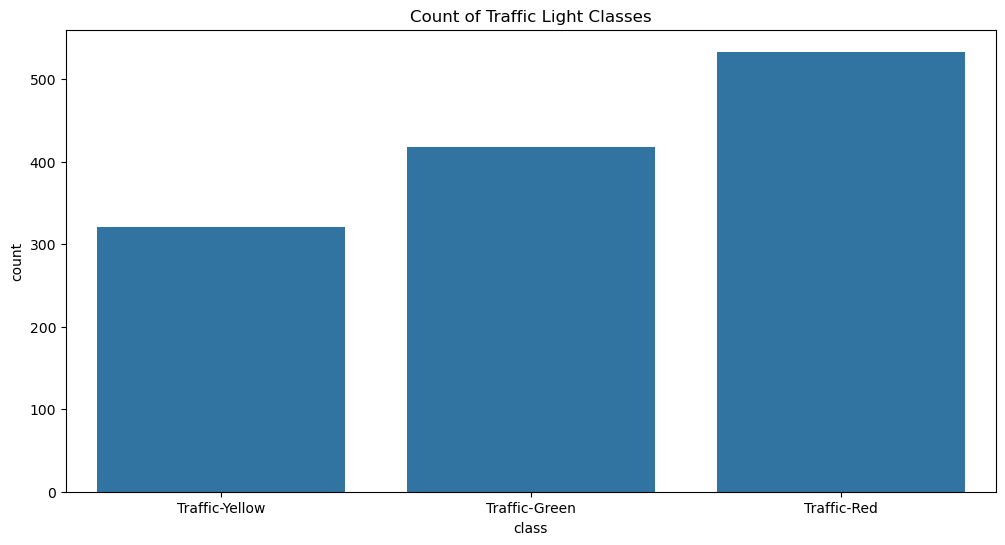

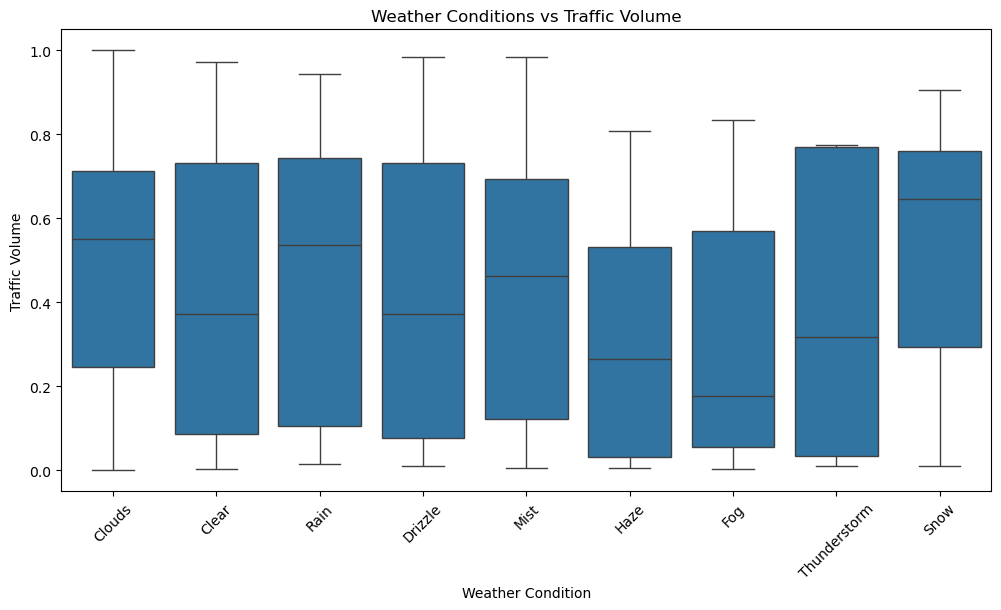

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
combined_data = pd.read_csv('cleaned_normalized_traffic_light_data.csv')

# Display the first few rows to verify the data
print(combined_data.head())

# Plot the distribution of traffic volume
plt.figure(figsize=(12, 6))
sns.histplot(combined_data['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

# Plot the relationship between temperature and traffic volume
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='traffic_volume', data=combined_data)
plt.title('Temperature vs Traffic Volume')
plt.show()

# Plot the count of traffic light classes
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=combined_data)
plt.title('Count of Traffic Light Classes')
plt.show()

# Plot the relationship between weather conditions and traffic volume
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_main', y='traffic_volume', data=combined_data)
plt.title('Weather Conditions vs Traffic Volume')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.show()